# Predictive Analytics Assignment - 1

The **Boston Housing Dataset** is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns :
- **crim** : per capita crime rate by town.
- **zn** : proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus** : proportion of non-retail business acres per town.
- **chas** : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- **nox** : nitrogen oxides concentration (parts per 10 million).
- **rm** : average number of rooms per dwelling.
- **age** : proportion of owner-occupied units built prior to 1940.
- **dis** : weighted mean of distances to five Boston employment centres.
- **rad** : index of accessibility to radial highways.
- **tax** : full-value property-tax rate per \\$10,000.
- **ptratio** : pupil-teacher ratio by town.
- **black** : 1000(Bk - 0.63)<sup>2</sup> where Bk is the proportion of blacks by town.
- **lstat** : lower status of the population (percent).
- **medv** : median value of owner-occupied homes in $1000s.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Boston.csv')

In [4]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Q1.** Report the “class” of the data set. How many rows and columns are in this data set? What do the rows and columns represent?

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(506, 15)

**Answer** : The Boston data set is of class data frame. It contains 506 rows and 15 columns.

Each row represents a suburb in the Boston Metropolitan Area.

The first column represents an index and the rest of the columns represent variables describing the characteristics of each suburb such as crime rate, nitrogen oxides concentration, pupil-teacher ratio by town, etc.

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### **Q2.** Create a smaller data set with the variables median value of owner-occupied homes, per capita crime rate, nitrogen oxides concentration, proportion of blacks and percentage of lower status of the population. Choosing median value of owner occupied homes as the response and the rest as the predictors, make scatter plots of the response versus each predictor. Present the scatter plots in different panels of the same graph. Comment on your findings.

In [17]:
smaller_df = df[["crim", "nox", "black", "lstat", "medv"]]
smaller_df.head()

,crim,nox,black,lstat,medv
0,0.00632,0.538,396.90,4.98,24.0
1,0.02731,0.469,396.90,9.14,21.6
2,0.02729,0.469,392.83,4.03,34.7
3,0.03237,0.458,394.63,2.94,33.4
4,0.06905,0.458,396.90,5.33,36.2


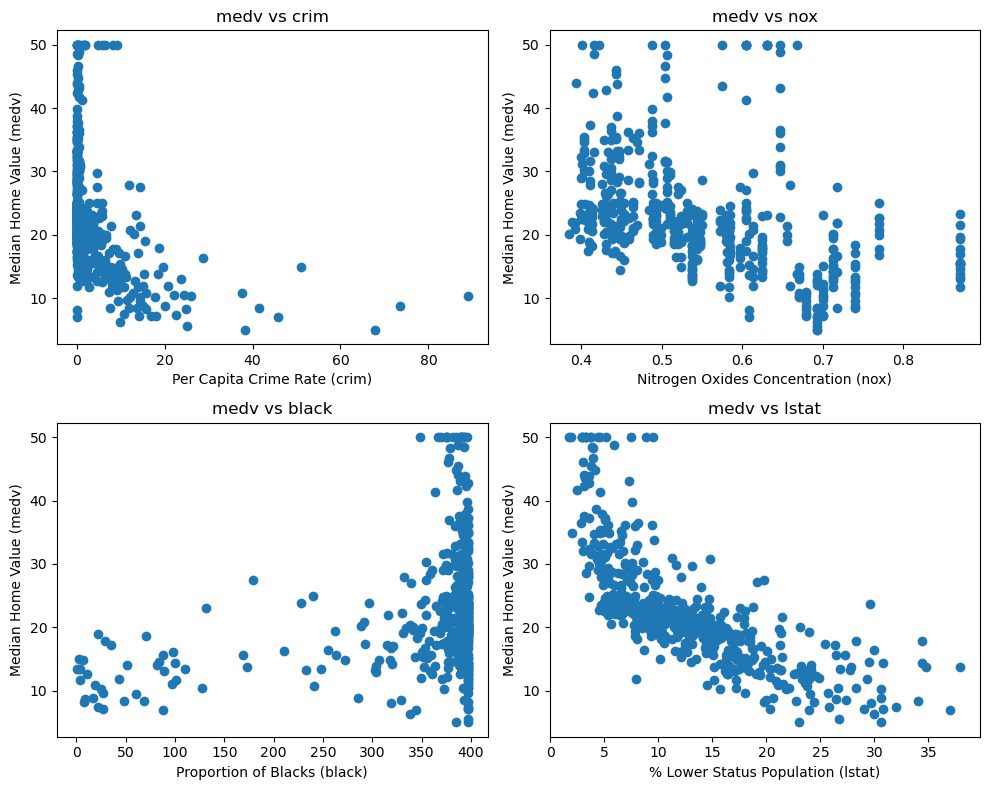

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(smaller_df["crim"], smaller_df["medv"])
axes[0, 0].set_xlabel("Per Capita Crime Rate (crim)")
axes[0, 0].set_ylabel("Median Home Value (medv)")
axes[0, 0].set_title("medv vs crim")

axes[0, 1].scatter(smaller_df["nox"], smaller_df["medv"])
axes[0, 1].set_xlabel("Nitrogen Oxides Concentration (nox)")
axes[0, 1].set_ylabel("Median Home Value (medv)")
axes[0, 1].set_title("medv vs nox")

axes[1, 0].scatter(smaller_df["black"], smaller_df["medv"])
axes[1, 0].set_xlabel("Proportion of Blacks (black)")
axes[1, 0].set_ylabel("Median Home Value (medv)")
axes[1, 0].set_title("medv vs black")

axes[1, 1].scatter(smaller_df["lstat"], smaller_df["medv"])
axes[1, 1].set_xlabel("% Lower Status Population (lstat)")
axes[1, 1].set_ylabel("Median Home Value (medv)")
axes[1, 1].set_title("medv vs lstat")

plt.tight_layout()
plt.show()


**Comments :** The following interpretations can be made about the scatter plots :

1. **medv vs crim** : There is distinct negative, non-linear relationship. The highest property values are exclusively clustered where the crime rates are low. The majority of the points are squashed against the left side indicating that most of the towns in the dataset have low per capita crime.

2. **medv vs nox** : There is moderate negative correlation. As the concentration of nitrogen oxides in nature increases, the median house value decreases. There is significant spread in the points.

3. **medv vs black** : There is a slight positive correlation. The dense scatter at the maximum x-value with varying y-value shows that the for a lot of the towns in the dataset demographic metric is uniform and price variation depends on other factors.

4. **medv vs lstat** : There is a strong negative, non-linear correlation. As the percentage of lower status population increases, the median home value decreases.


--------------------------------------------------------------------------------------------------------------------------------------------------------

#### **Q3.** Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors mentioned in (2), for that suburb. How do these values compare to the overall ranges for those predictors? Comment on your findings. Hint: Mention which percentile these values belong to.

In [46]:
min_medv_index = df["medv"].idxmin()
min_medv_index

398

In [48]:
lowest_medv_suburb = df.loc[min_medv_index]

lowest_medv_suburb[["medv", "crim", "nox", "black", "lstat"]]

In [50]:
variables = ["crim", "nox", "black", "lstat"]

percentiles = {}
for var in variables:
    value = lowest_medv_suburb[var]
    percentiles[var] = np.mean(df[var] <= value)

percentiles

{'crim': np.float64(0.9881422924901185),
 'nox': np.float64(0.857707509881423),
 'black': np.float64(1.0),
 'lstat': np.float64(0.9782608695652174)}

**Comments** : The suburb with the lowest median home value exhibits extremely adverse characteristics across all considered predictors:

- Crime rate (crim) is in the 98.8th percentile, indicating one of the highest crime levels among all suburbs.

- Nitrogen oxide concentration (nox) lies around the 85.8th percentile, reflecting substantially elevated pollution.

- Proportion of Blacks (black) is at the 100th percentile, meaning this suburb has the highest value of this variable in the dataset.

- Lower status population (lstat) is in the 97.8th percentile, indicating extreme socioeconomic disadvantage.

Overall, this suburb ranks among the worst across nearly all predictors, which strongly aligns with and helps explain its exceptionally low median housing value.

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### **Q4.** Does any suburb of Boston stand out for having notably high crime rates, tax rates, or pupil–teacher ratios? Hint: Use a boxplot to detect any outliers. If so, identify the suburbs that show the outlier values.

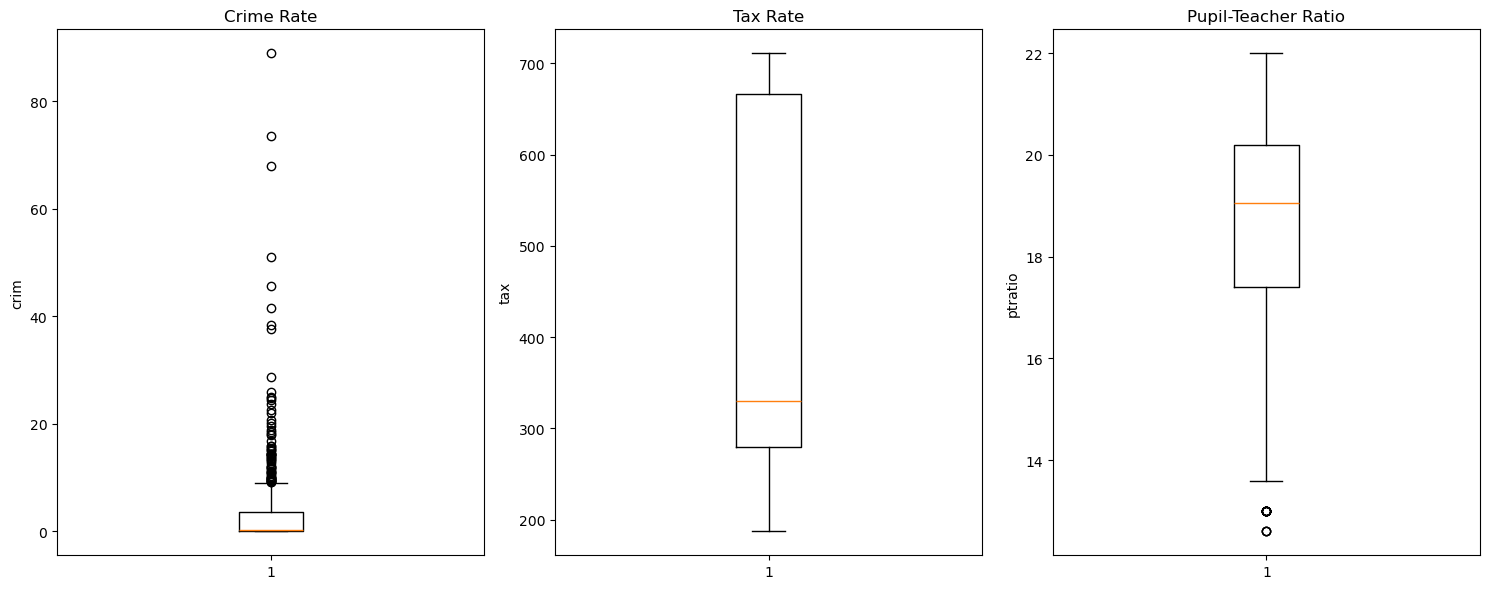

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].boxplot(df["crim"])
axes[0].set_title("Crime Rate")
axes[0].set_ylabel("crim")

axes[1].boxplot(df["tax"])
axes[1].set_title("Tax Rate")
axes[1].set_ylabel("tax")

axes[2].boxplot(df["ptratio"])
axes[2].set_title("Pupil-Teacher Ratio")
axes[2].set_ylabel("ptratio")

plt.tight_layout()
plt.show()

In [38]:
outliers = {}
variables2 = ["crim", "tax", "ptratio"]
for var in variables2:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    
    outliers[var] = df[(df[var] > upper)|(df[var] < lower)].index.tolist()

outliers

{'crim': [367,
  371,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  381,
  382,
  384,
  385,
  386,
  387,
  388,
  392,
  394,
  398,
  399,
  400,
  401,
  402,
  403,
  404,
  405,
  406,
  407,
  409,
  410,
  411,
  412,
  413,
  414,
  415,
  416,
  417,
  418,
  419,
  420,
  422,
  425,
  426,
  427,
  429,
  431,
  434,
  435,
  436,
  437,
  438,
  439,
  440,
  441,
  443,
  444,
  445,
  447,
  448,
  454,
  468,
  469,
  477,
  478,
  479],
 'tax': [],
 'ptratio': [196,
  197,
  198,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  264,
  265,
  266,
  267,
  268]}

**Comments** : Yes, several suburbs stand out as outliers :

- Certain suburbs exhibit extremely high crime rates, far beyond the majority.

- There are no outliers in tax, i.e. no suburb shows extremely high or extremely low tax rates.

- A few suburbs also show unusually low pupil–teacher ratios.

These outliers highlight substantial inequality across Boston suburbs in terms of safety, taxation, and education quality.

--------------------------------------------------------------------------------------------------------------------------------------------------------